# Explore here

In [47]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
datos = pd.read_csv(url)  

# Mostrar las primeras filas 
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
datos.shape

(1338, 7)

In [49]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
datos.duplicated().sum()

np.int64(1)

In [51]:
data_limpia = datos.drop_duplicates()
print(data_limpia.shape)
data_limpia.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
num_cols = data_limpia.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data_limpia.select_dtypes(include=['object',"category"]).columns

print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


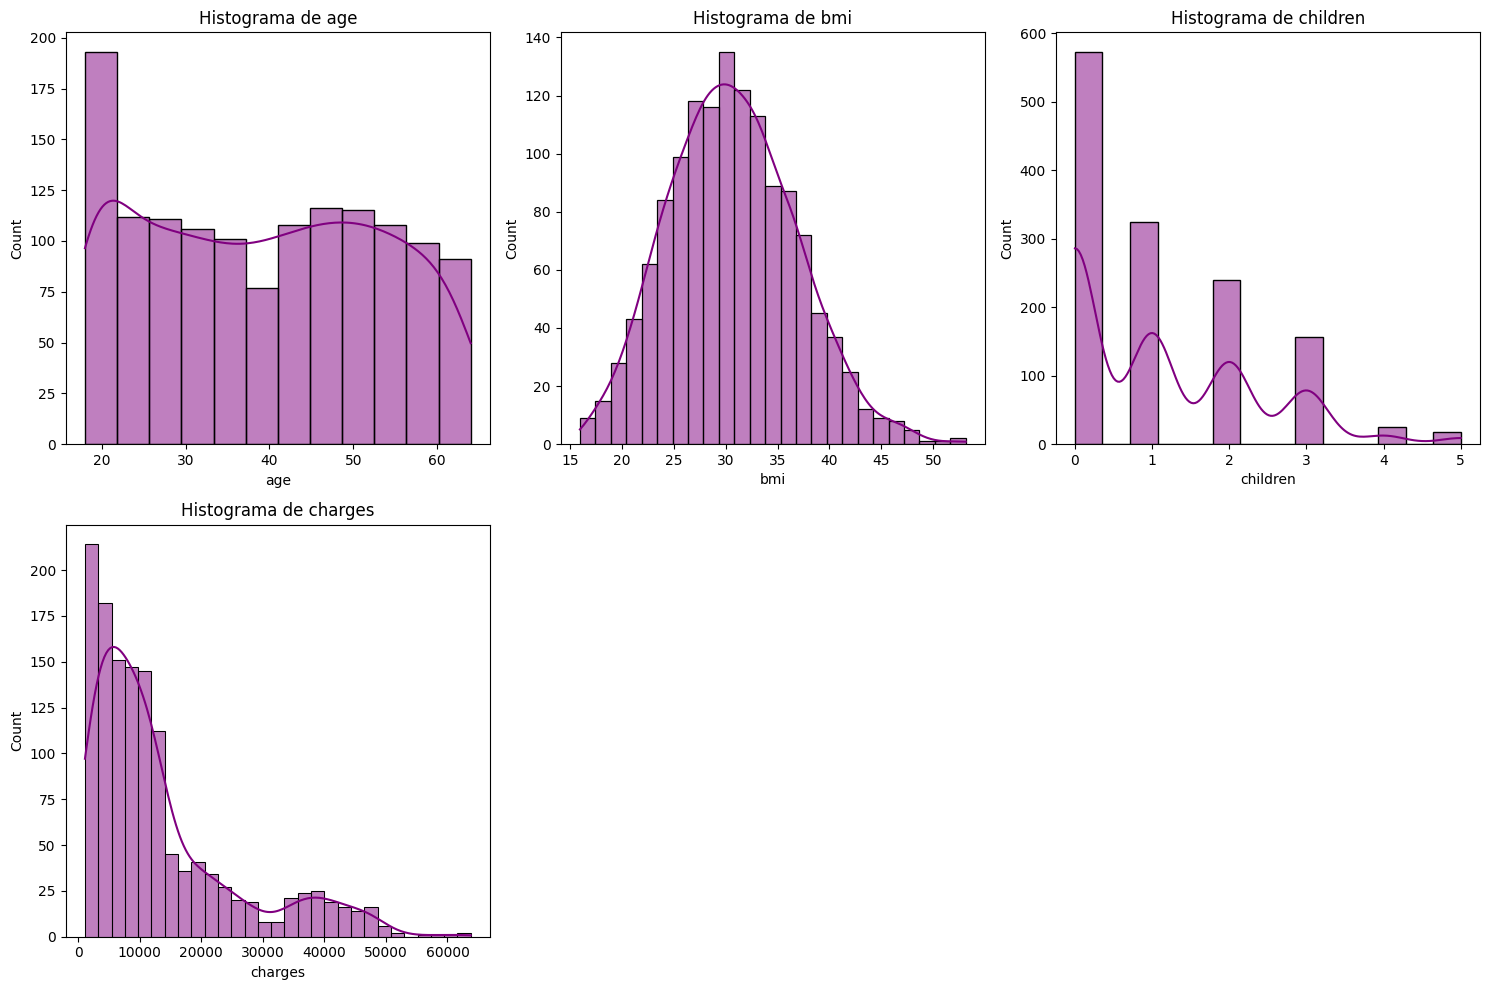

In [53]:
#Histo Numericas

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Usar la variable ya definida num_cols
columns = num_cols

# Fijar el número de columnas por fila a 3
cols_per_row = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(columns) / cols_per_row)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, cols_per_row) if num_rows > 1 else [axes]

# Generar los gráficos (histogramas)
col_index = 0
for row in range(num_rows):
    for col in range(cols_per_row):
        if col_index < len(columns):
            sns.histplot(data=data_limpia, x=columns[col_index], kde=True, ax=axes[row][col], color="purple")
            axes[row][col].set_title(f"Histograma de {columns[col_index]}")
            col_index += 1
        else:
            # Ocultar los ejes vacíos en lugar de eliminarlos
            axes[row][col].axis("off")  # Desactivar los ejes vacíos

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

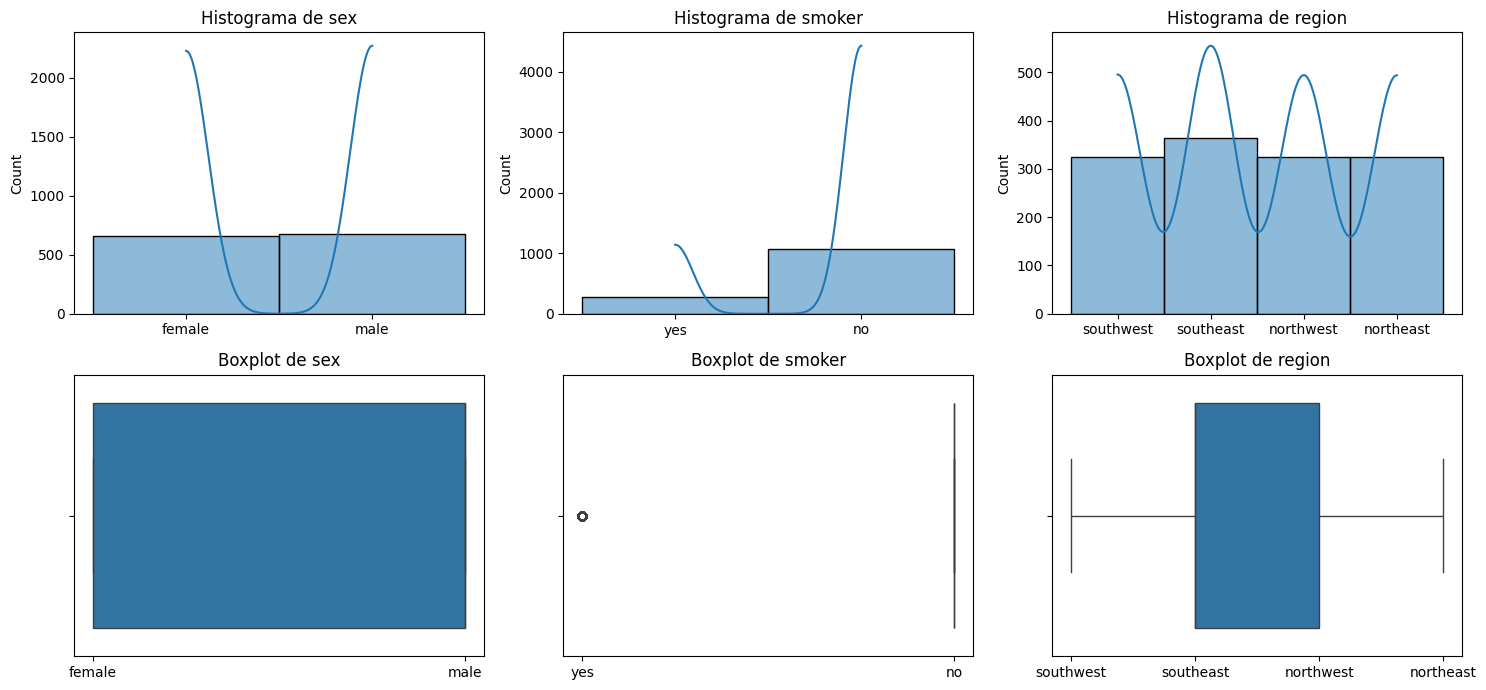

In [54]:
def graficar_categoricas(df, columnas):
   
    n = len(columnas)  
    n_columnas = 3 
    n_filas = 2
    
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(15, 7))
    
    axis = axis.flatten()

    for i, col in enumerate(columnas):
        sns.histplot(df[col], bins=30, kde=True, ax=axis[i]).set(xlabel=None)
        axis[i].set_title(f'Histograma de {col}')
                
        sns.boxplot(data=df, x=col, ax=axis[i + n_columnas]).set(xlabel=None)
        axis[i + n_columnas].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

### Segmentar por "n_columns" para que salgan los hisplots/boxplots.
graficar_categoricas(data_limpia, cat_cols)

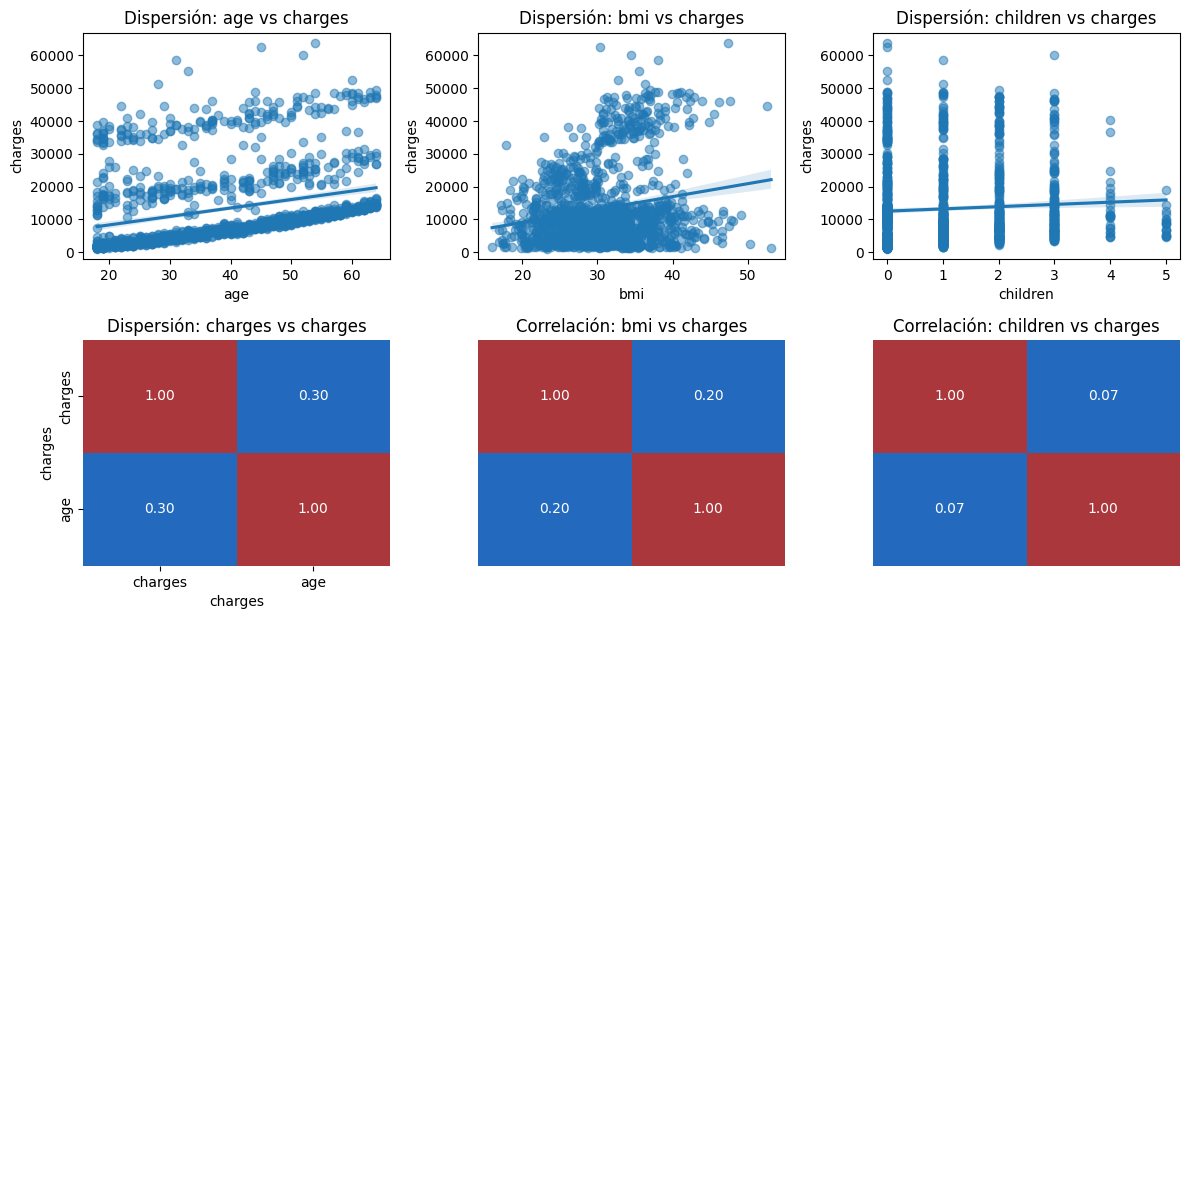

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def graficar_dispersiones_y_heatmaps(df, columnas, target_col, n_columnas=3):
    # Verificar que la columna target exista en el DataFrame
    if target_col not in df.columns:
        raise KeyError(f"La columna '{target_col}' no existe en el DataFrame.")

    # Calcular el número de filas necesarias
    n = len(columnas)
    n_filas = math.ceil(n / n_columnas)

    # Crear la figura con el número dinámico de filas y columnas
    fig, axis = plt.subplots(n_filas * 2, n_columnas, figsize=(n_columnas * 4, n_filas * 6))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar los gráficos de dispersión
    for i, col in enumerate(columnas):
        # Gráfico de dispersión
        sns.regplot(ax=axis[i], data=df, x=col, y=target_col, scatter_kws={"alpha": 0.5})
        axis[i].set_title(f'Dispersión: {col} vs {target_col}', fontsize=12)

        # Verificar si la columna no es la misma que la columna objetivo (para evitar correlación de "charges" con "charges")
        if col != target_col:
            # Heatmap de correlación
            sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas], cbar=False, cmap="vlag")
            axis[i + n_columnas].set_title(f'Correlación: {col} vs {target_col}', fontsize=12)

    # Ocultar los ejes vacíos
    for j in range(len(columnas), len(axis)):
        axis[j].axis("off")

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

# Llamar a la función con las columnas numéricas y la columna target factorizada ("charges")
graficar_dispersiones_y_heatmaps(datos, num_cols, "charges")


In [56]:
import json
import pandas as pd

# Supongamos que cat_cols es una lista de columnas categóricas
columns_to_factorize = cat_cols

# Diccionario para guardar todos los mapeos en uno solo
all_factorization_mappings = {}

# Asegurarse de que data_limpia sea una copia explícita del DataFrame original
data_limpia = data_limpia.copy()

# Loop para factorizar cada columna y guardar los mapeos
for column in columns_to_factorize:
    # Factorizar la columna y guardar los mapeos
    data_limpia[column], mapping = pd.factorize(data_limpia[column])
    all_factorization_mappings[column] = dict(enumerate(mapping))

# Mostrar todos los mapeos
for column, mapping in all_factorization_mappings.items():
    print(f"Reglas para '{column}': {mapping}")

# Guardar todos los mapeos en un solo archivo JSON
with open("../models/factorization_mappings.json", "w") as f:
    json.dump(all_factorization_mappings, f, indent=4)

Reglas para 'sex': {0: 'female', 1: 'male'}
Reglas para 'smoker': {0: 'yes', 1: 'no'}
Reglas para 'region': {0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}


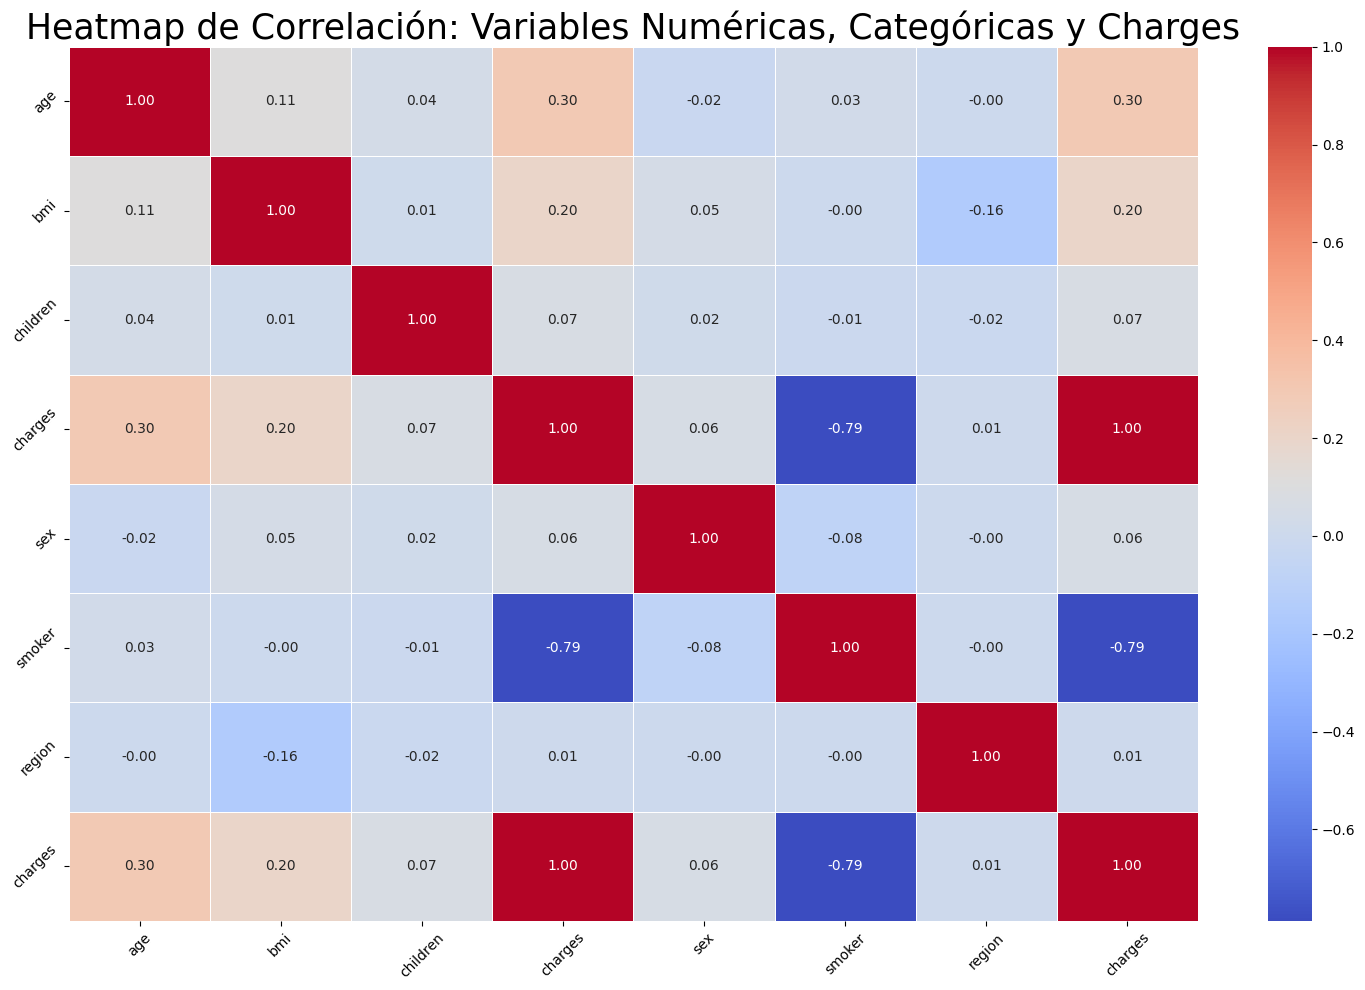

In [57]:
# Convertir num_cols y cat_cols a listas de Python
num_cols_list = list(num_cols)
cat_cols_list = list(cat_cols)

# Combinar las columnas numéricas originales, las columnas factorizadas y la variable objetivo "charges"
columnas_combinadas = num_cols_list + cat_cols_list +  ["charges"]

# Verificar que las columnas existan en el DataFrame
for col in columnas_combinadas:
    if col not in data_limpia.columns:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Crear la figura
plt.figure(figsize=(15, 10))

# Heatmap de correlación
sns.heatmap(data_limpia[columnas_combinadas].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título y etiquetas
plt.title("Heatmap de Correlación: Variables Numéricas, Categóricas y Charges", fontsize=25)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.yticks(rotation=45)  # Rotar etiquetas del eje y

# Ajustar el layout
plt.tight_layout()

# Mostrar el heatmap
plt.show()

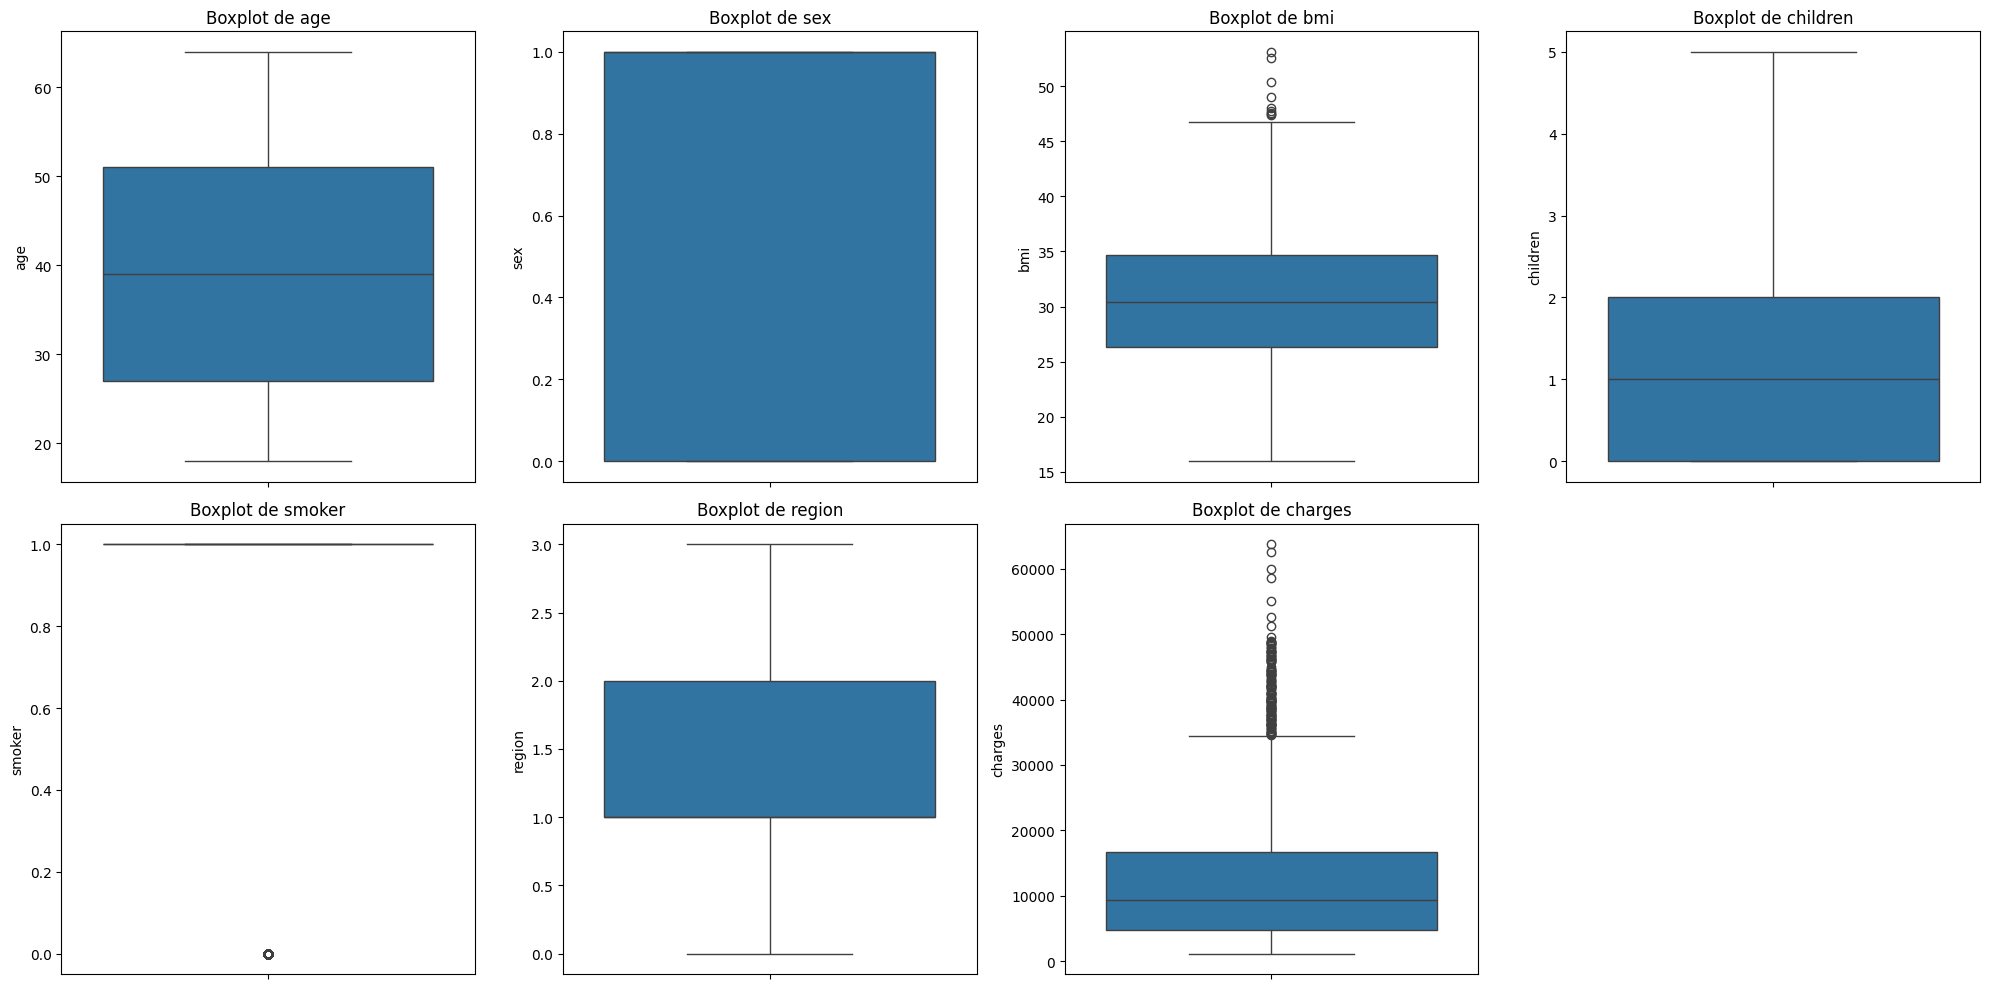

In [58]:
def generar_boxplots_automaticos(df):
   
    # Filtrar las columnas numéricas del DataFrame, como ya esta normalizado, son todas. 
    columnas = df.columns

    n_columnas = 4
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna del DataFrame
    for i, col in enumerate(columnas):
        sns.boxplot(ax=axis[i], data=df, y=col)
        axis[i].set_title(f'Boxplot de {col}')

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

generar_boxplots_automaticos(data_limpia)

In [59]:
import os 

total_data_con_outliers = data_limpia.copy() 
total_data_sin_outliers = data_limpia.copy()

col_con_outliers = ["bmi"]

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)]}

In [60]:

total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
#SPLIT

from sklearn.model_selection import train_test_split

# Obtener las columnas numéricas
num_variables = total_data_con_outliers.copy().drop("charges", axis=1).columns.tolist()

# Dividir el conjunto de datos en train y test
X_con_outliers = total_data_con_outliers.drop("charges", axis=1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis=1)[num_variables]
y = total_data_con_outliers["charges"]

# Dividir los datos con outliers
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)

# Dividir los datos sin outliers
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)

# Guardar los datasets en archivos Excel
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)

# Mostrar las primeras filas del conjunto de entrenamiento con outliers
X_train_con_outliers.head()

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,1,3
968,21,1,25.745,2,1,3
599,52,0,37.525,2,1,2
170,63,1,41.470,0,1,1
275,47,0,26.600,2,1,3


In [62]:
# ESCALADO

from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,sex,bmi,children,smoker,region
1114,-1.157680,0.971409,-0.996928,-0.907908,0.500292,1.383946
968,-1.300619,0.971409,-0.792762,0.766904,0.500292,1.383946
599,0.914926,-1.029432,1.154664,0.766904,0.500292,0.477983
170,1.701087,0.971409,1.806837,-0.907908,0.500292,-0.427981
275,0.557580,-1.029432,-0.651417,0.766904,0.500292,1.383946


In [63]:
#NORMALIZADO

from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,sex,bmi,children,smoker,region
1114,0.108696,1.0,0.230024,0.0,1.0,1.000000
968,0.065217,1.0,0.263250,0.4,1.0,1.000000
599,0.739130,0.0,0.580172,0.4,1.0,0.666667
170,0.978261,1.0,0.686306,0.0,1.0,0.333333
275,0.630435,0.0,0.286252,0.4,1.0,1.000000


In [64]:
print(X_train_con_outliers_scal.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [ ]:
#print(X_test_con_outliers_scal.isnull().sum())